# Download data

## Upload libraries

In [ ]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import pickle
import gzip

# Model
import keras
import tensorflow as tf

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Create path variable
path = os.getcwd() + '\\' 

# URL and filename
url = 'http://deeplearning.net/data/mnist/'
filename = 'mnist.pkl.gz'

# download data
file, headers = urllib.request.urlretrieve(url + filename, path + filename)

In [18]:
def load_mnist(filename):
    """Extract form pickled gzip format dataframe"""
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

# Data stores in 3 main tuples
(X_train, y_train), (X_valid, y_valid), (X_test, y_test) = load_mnist(path + filename)

In [19]:
# Check shapes
X_train.shape, X_valid.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

# Brief EDA
- Check picture example

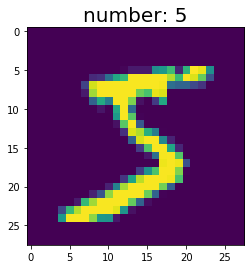

In [21]:
# Reshape to images back to 28 x 28
imgs = np.reshape(X_train, (-1, 28, 28))

# Plot 1 instance
plt.imshow(imgs[0])
plt.title(f'number: {y_train[0]}', size=20)
plt.show()

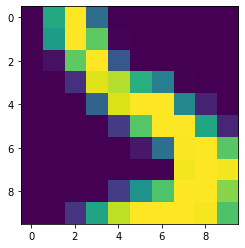

In [22]:
# Plot a part of an image
plt.imshow(imgs[0, 10:20, 10:20])
plt.show()

# Prepare data

## Learning parameters

In [23]:
batch_size = 128
epochs = 5
num_classes = 10

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Normalization
- It's important to perform data normalization as soon as we train parameterized model
- Use train mean and std for validation and test sets

In [24]:
# Mean and std
train_mean = X_train.mean()
train_std = X_train.std()

# Normalize train, validation and test
X_train = (X_train - train_mean)/train_std
X_valid = (X_valid - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

# Modeling

## Neural Nets

### Simple Feed Forward Net

In [25]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_valid, y_valid))

score = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 14s 283

### Convolution Net

In [ ]:
model = Sequential()
model